In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from connector import getConnection

### Interestin income distribution

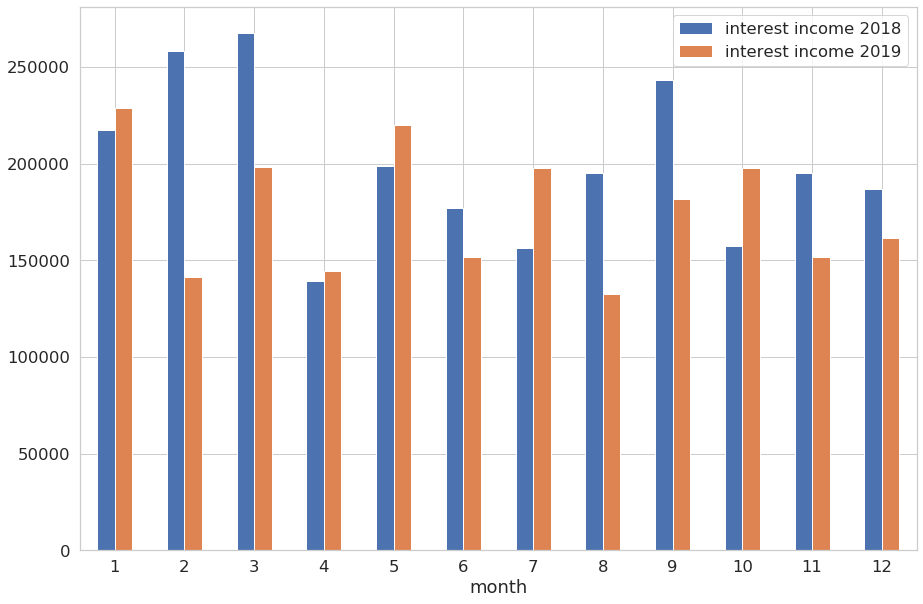

In [2]:
conn = getConnection()

sql = """WITH interest_income_query AS(SELECT  s.sale_date_key, s.branch_key, s.product_key , s.customer_key, s. loan_amount , SUM(i.interest) AS interest_income
FROM
sale s, installment i
WHERE s.sale_date_key = i.sale_date_key AND
 s.branch_key = i.sale_branch_key AND 
 s.product_key = i.sale_product_key AND
 s.customer_key = i.sale_customer_key
GROUP BY s.sale_date_key, s.branch_key, s.product_key , s.customer_key) 
SELECT iq_2018.month, ROUND(iq_2018.fees::numeric,2) as "interest income 2018",  ROUND(iq_2019.fees::numeric,2) as "interest income 2019"
FROM  
(SELECT d.month, SUM(q.interest_income) AS fees 
FROM public."date" d, interest_income_query q
WHERE d.date_key = q.sale_date_key AND d.year = 2018 
group by d.month) AS iq_2018, 
(SELECT d.month, SUM(q.interest_income) AS fees 
FROM public."date" d, interest_income_query q
WHERE d.date_key = q.sale_date_key AND d.year = 2019 
GROUP BY d.month) AS iq_2019 
WHERE iq_2018.month = iq_2019.month 
ORDER BY iq_2019.month """

df = sqlio.read_sql_query(sql, conn)
df.head()
conn.close()
df.plot(x="month", y=["interest income 2018", "interest income 2019"], kind="bar",figsize=(15,10), rot = 0)


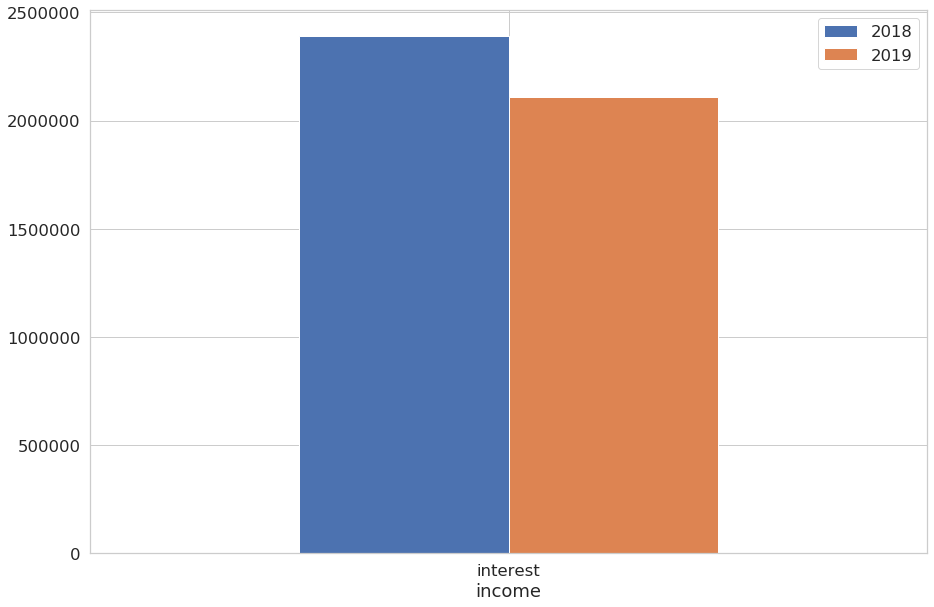

In [23]:
conn = getConnection()

sql = """WITH interest_income_query AS(SELECT  s.sale_date_key, s.branch_key, s.product_key , s.customer_key, s. loan_amount , SUM(i.interest) AS interest_income
FROM
sale s, installment i
WHERE s.sale_date_key = i.sale_date_key AND
 s.branch_key = i.sale_branch_key AND 
 s.product_key = i.sale_product_key AND
 s.customer_key = i.sale_customer_key
GROUP BY s.sale_date_key, s.branch_key, s.product_key , s.customer_key) 
SELECT 'interest' as income ,ROUND(iq_2018.fees::numeric,2) as "2018",  ROUND(iq_2019.fees::numeric,2) as "2019"
FROM  
(SELECT d.year, SUM(q.interest_income) AS fees 
FROM public."date" d, interest_income_query q
WHERE d.date_key = q.sale_date_key AND d.year = 2018 
group by d.year) AS iq_2018, 
(SELECT d.year, SUM(q.interest_income) AS fees 
FROM public."date" d, interest_income_query q
WHERE d.date_key = q.sale_date_key AND d.year = 2019 
GROUP BY d.year) AS iq_2019 
 """

df = sqlio.read_sql_query(sql, conn)
df = df.set_index('income')
conn.close()
df.head()
df.plot(y=["2018", "2019"], kind="bar",figsize=(15,10), rot = 0)
